# 펭권 몸무게 예측
#### 목적 : 펭귄의 종류, 날개 길이, 부리 깊이 등 펭귄들의 정보를 담은 데이터를 통해 각 펭귄의 몸무게를 예측

###### train.csv : 학습 데이터  
-id : 샘플 아이디  
-Species: 펭귄의 종을 나타내는 문자열  
-Island : 샘플들이 수집된 Palmer Station 근처 섬 이름  
-Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
-Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
-Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
-Flipper Length (mm) : 펭귄의 팔(날개) 길이  
-Sex : 펭귄의 성별  
-Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
-Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율  
-Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


  
###### 2. test.csv : 테스트 데이터  
-id : 샘플 아이디  
-Species: 펭귄의 종을 나타내는 문자열  
-Island : 샘플들이 수집된 Palmer Station 근처 섬 이름  
-Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
-Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
-Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
-Flipper Length (mm) : 펭귄의 팔(날개) 길이  
-Sex : 펭귄의 성별  
-Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
-Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율


###### 3. sample_submissoin.csv : 제출 양식  
-id : 샘플 아이디  
-Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)



###### 데이터 상세 설명  
성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.  
남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율.  
데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.  
출처: https://allisonhorst.github.io/palmerpenguins/



# LIBRARY

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use("seaborn")

In [100]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [101]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


# DATA CLEANSING & ANALYSIS


In [102]:
train.isnull().count()
train.isnull().sum().sort_values(ascending=False)


Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [103]:
(train.isnull().sum()
           /train.isnull().count()).sort_values(ascending=False)

Sex                    0.026316
Delta 15 N (o/oo)      0.026316
Delta 13 C (o/oo)      0.026316
id                     0.000000
Species                0.000000
Island                 0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.000000
Culmen Depth (mm)      0.000000
Flipper Length (mm)    0.000000
Body Mass (g)          0.000000
dtype: float64

In [104]:
#drop id column
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [105]:
train.shape,test.shape


((114, 10), (228, 9))

In [106]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [107]:
train.describe()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [108]:
target = train['Body Mass (g)'] #목표설정
object_columns = ['Species','Island','Clutch Completion','Sex']
numerical_columns= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
#object 컬럼과 #숫자 컬럼을 나눠줌

# Object Columns



In [109]:
#for _ in 참고 : https://syujisu.tistory.com/130
#파이썬에서 언더스코어(_)
#인터프리터(Interpreter)에서 마지막 값을 저장할 때
#값을 무시하고 싶을 때 (흔히 “I don’t care"라고 부른다.)
#변수나 함수명에 특별한 의미 또는 기능을 부여하고자 할 때
#국제화(Internationalization, i18n)/지역화(Localization, l10n) 함수로써 사용할 때
#숫자 리터럴값의 자릿수 구분을 위한 구분자로써 사용할 때

Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64


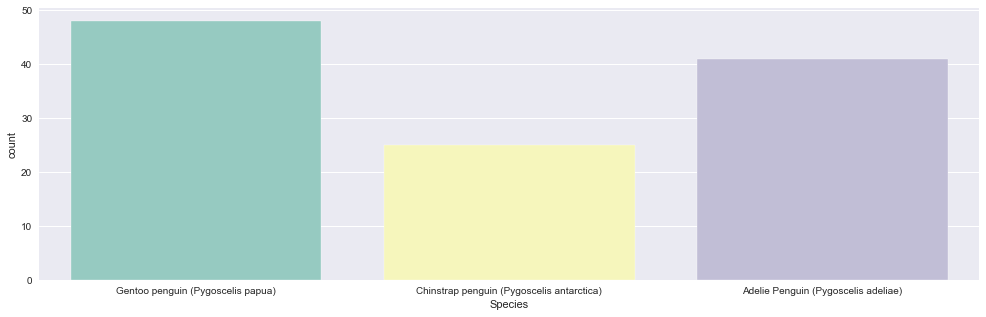

Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64


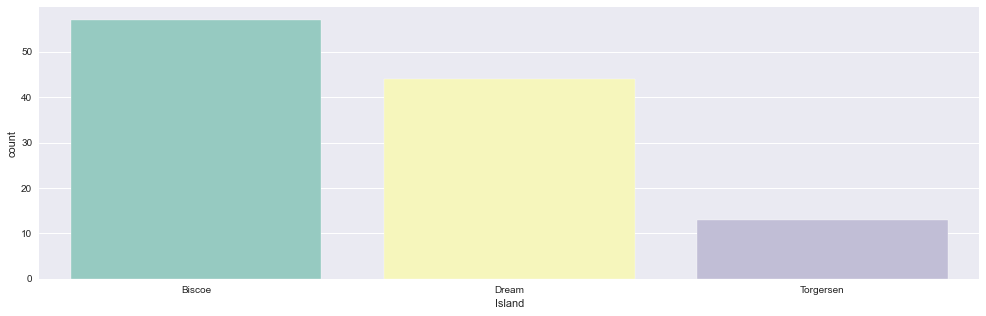

Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64


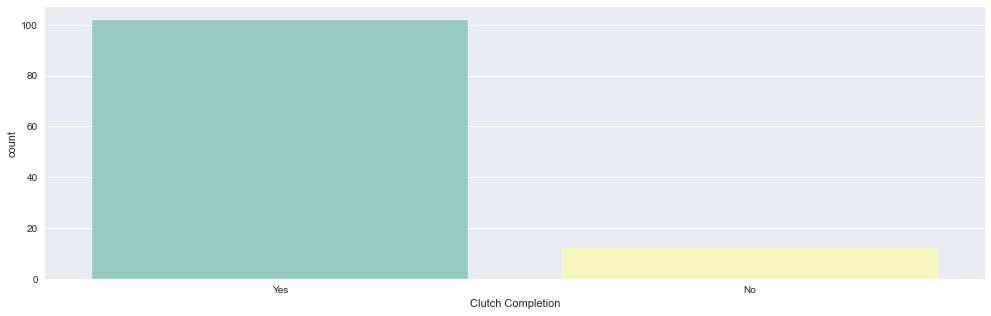

Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64


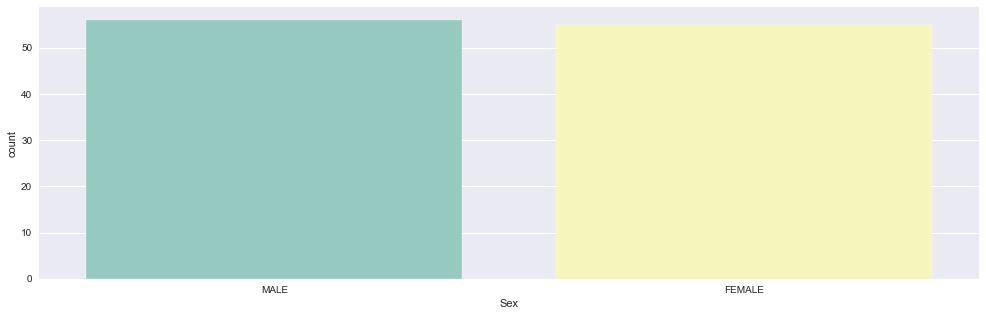

In [110]:
for _ in object_columns:
    print(_)
    print(train[_].value_counts())
    
    #위에 값들을 표로 만들어주기 
    plt.figure(figsize=(15, 5))
    sns.countplot(x=train[_],palette='Set3')
    plt.show()

#Clutch Completion : 둥지의 알이 2개 Yes로 표기  
### Yes가 90% 이상

    
    
    

# Numerical Columns 

Culmen Depth (mm)


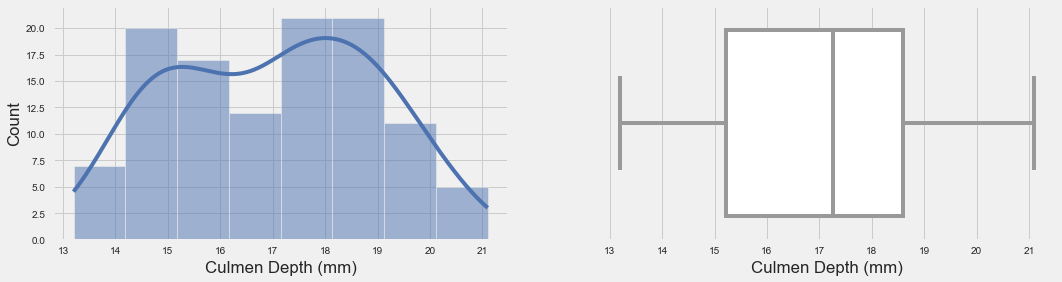

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


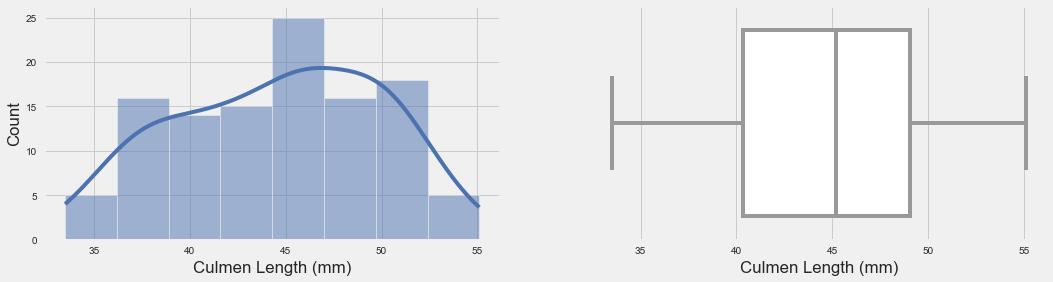

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


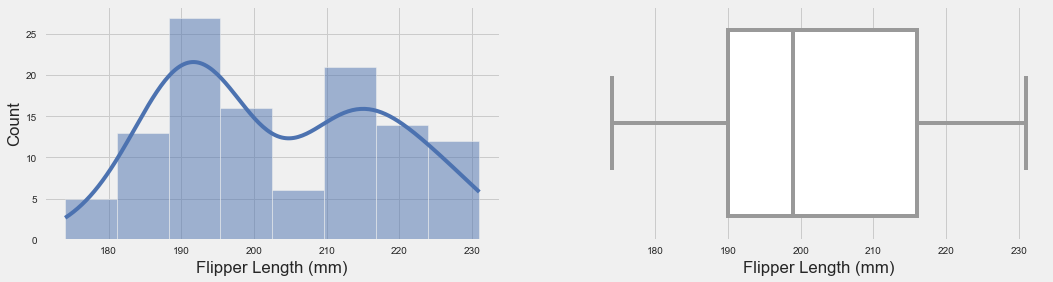

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


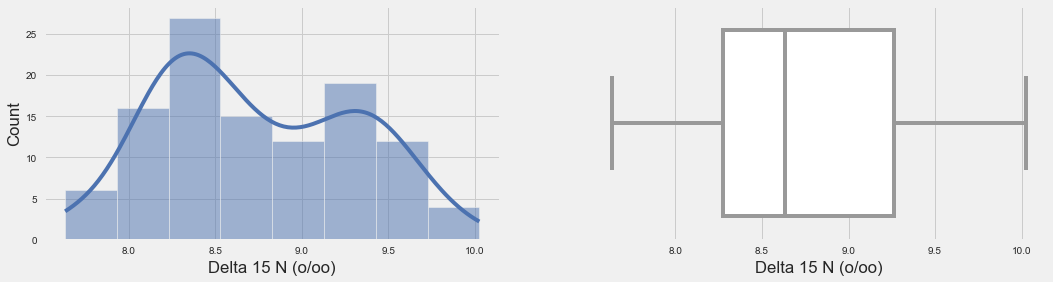

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


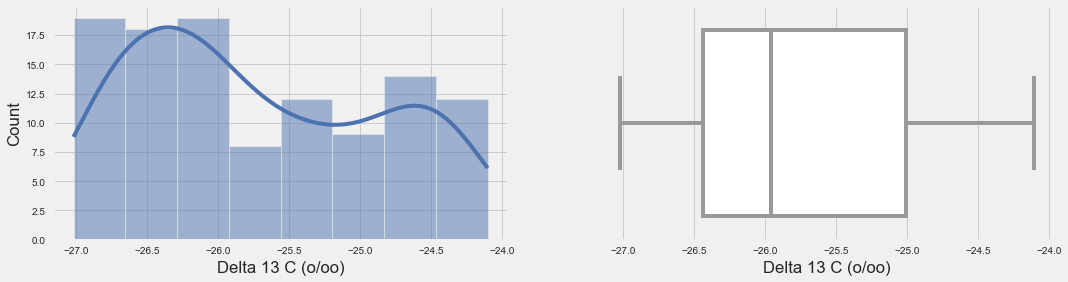

<Figure size 1080x360 with 0 Axes>

In [111]:
plt.style.use('fivethirtyeight')

for _ in numerical_columns:
    print(_)
    
    f,ax=plt.subplots(1,2,figsize=(16,4)) 
    
    #print에서 5개의 컬럼값이 있으므로 자연스럽게 5개 표생성됨
    #하나의 ax 를 가지는 하나의 figure 생성(ax의 색깔 지정 못함)
    #subplots(nrows=2, ncols=1)
    
    plt.figure(figsize=(15,5)) #위에 있는데 굳이 왜붙힘? !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    sns.histplot(x=train[_],ax=ax[0],kde=True) #ax는 순서 
    sns.boxplot(x=train[_],ax=ax[1],color='white')
    plt.show()  


#fivethirtyeight : https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html
#figure 와 ax 객체를 생성하는 방법
    #1. fig = plt.figure() : ax 없는 빈 figure 생성 (후에 ax를 추가해줘야함)
    #2. fig, ax = plt.subplots() : 하나의 ax 만을 가지는 하나의 figure 생성
    #3. fig, axes = plt.subplots(2,2) : 4개(2*2)이 ax들을 가지는 하나의 figure 생성
    
#subplot vs subplots 차이 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294    

In [112]:
#Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
#Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
#Flipper Length (mm) : 펭귄의 팔(날개) 길이  
#Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
#Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율  

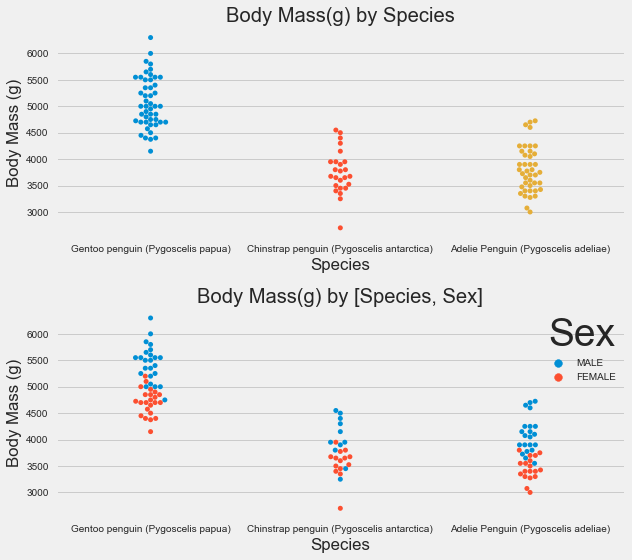

In [113]:
#Show 'Body Mass (g)' by Species. + 'Sex'

f, ax = plt.subplots(2, 1,figsize=(9, 8))
sns.swarmplot(data=train, x='Species', y='Body Mass (g)', ax=ax[0]);
ax[0].set_title("Body Mass(g) by Species")
sns.swarmplot(data=train, x='Species', y='Body Mass (g)', hue='Sex',ax=ax[1]);
ax[1].set_title("Body Mass(g) by [Species, Sex]")

plt.tight_layout() #show clearly


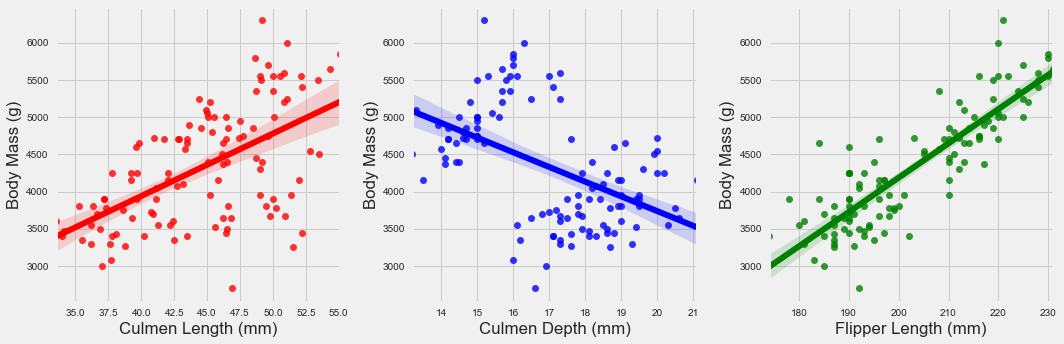

In [114]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.regplot(data=train, x='Culmen Length (mm)',y='Body Mass (g)',ax=ax[0],color='red')
sns.regplot(data=train, x='Culmen Depth (mm)',y='Body Mass (g)',ax=ax[1],color='blue')
sns.regplot(data=train, x='Flipper Length (mm)',y='Body Mass (g)',ax=ax[2],color='green')

plt.tight_layout()

#[Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm)] 컬럼들이 전반적으로 Body Mass (g)과 상관관계
#팔길이 가장 큰 상관관계

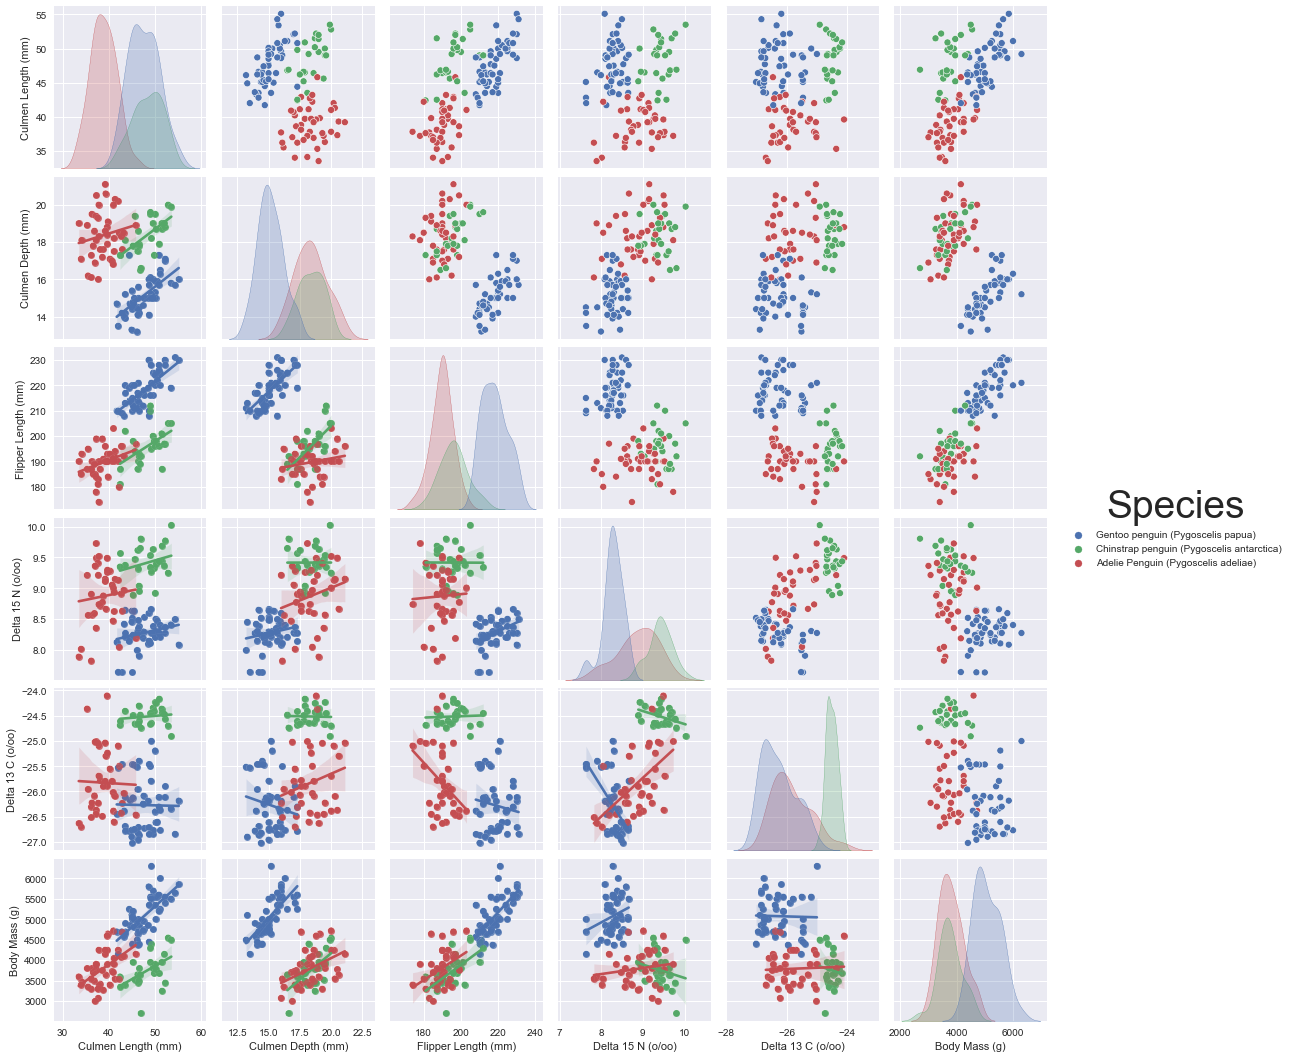

In [115]:
#종에 따라 부리길이/깊이/팔길이 차이 확인하기

plt.style.use('seaborn')
g= sns.pairplot(train,hue='Species')
g.map_lower(sns.regplot);

#chinstrap이 몸무게도 적은데 부리랑 날개길이 다 작구나. 
##이녀석이 delta13의 영향을 엄청나게 받은 아이였구나

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [117]:
train.describe()
#몸무게 차이가 엄청나. 

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


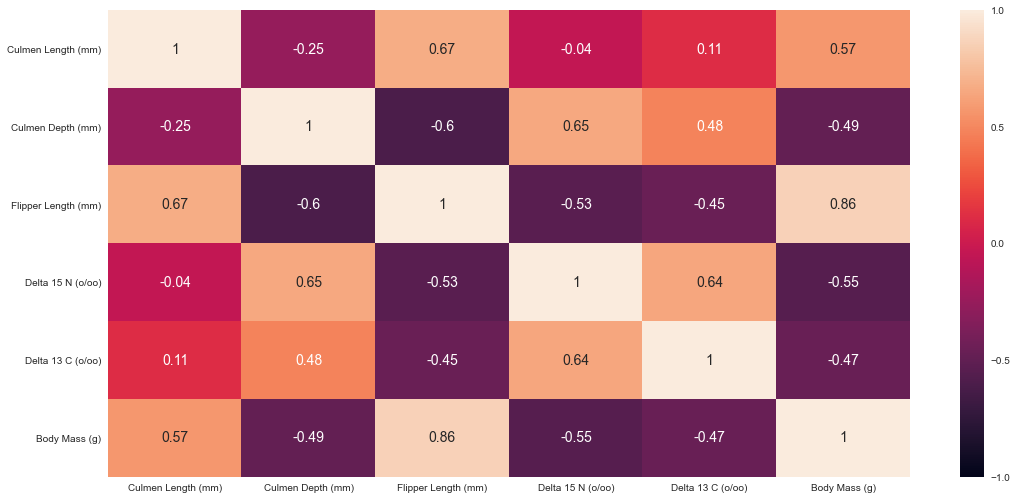

In [123]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,vmin=-1, vmax=1);
sns.set(font_scale=3.25) # 레이블의 폰트 사이즈를 조정
#날개랑 #부리길이가 제일 영향이 높다. 
#날개랑 부리랑도 연관이 높다.
#날개랑 깊이랑도 연관이 높고


In [119]:
#train.corr["Body Mass (g)"].sort_values()

 # Processing 결측값

In [120]:
train.isnull().sum()

#Delta 피쳐들은 평균으로 채워볼 수 있습니다..
#Sex 피쳐를 다루기 위해서 drop이나 mode로 채울 수 있습니다.
#그러나 데이터가ㅠ 적기 때문에 '합리적으로' 결측값을 채워봅시다.

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [121]:
train.corr()['Body Mass (g)']

Culmen Length (mm)     0.572063
Culmen Depth (mm)     -0.490643
Flipper Length (mm)    0.864814
Delta 15 N (o/oo)     -0.548678
Delta 13 C (o/oo)     -0.468425
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64

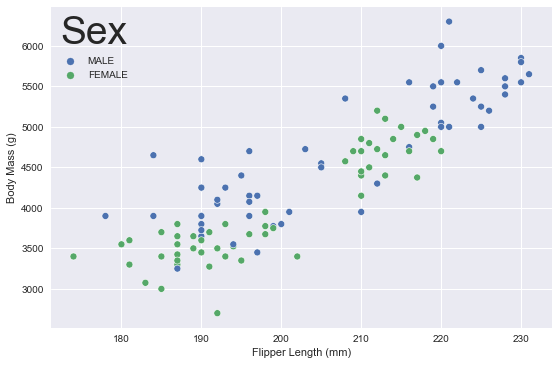

In [122]:
sns.scatterplot(data=train, x='Flipper Length (mm)', 
                y= 'Body Mass (g)', hue='Sex');
#Flipper Length (mm) & Body Mass (g)의 상관관계가 높은 것으로
#보입니다.또한 성별로 나누었을 때도 구분이 됩니다.


In [124]:
train.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()


,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,187.166667
1,Adelie Penguin (Pygoscelis adeliae),MALE,191.619048
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,192.642857
3,Chinstrap penguin (Pygoscelis antarctica),MALE,200.454545
4,Gentoo penguin (Pygoscelis papua),FEMALE,213.217391
5,Gentoo penguin (Pygoscelis papua),MALE,223.000000


In [125]:
train[train['Sex'].isnull()]

#예를 들어, 6번의 인덱스를 보면. Adelie Penguin (Pygoscelis adeliae 종의 Flipper Length (mm)는 190입니다.
#위의 표와 함께 유추하면, 성별은 'MALE'로 유추해볼 수 있습니다.

#(결측값이 많을 때에는 좋은 방법이 아닐 겁니다.)

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


In [127]:
test.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()


,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,188.000000
1,Adelie Penguin (Pygoscelis adeliae),MALE,192.730769
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,191.100000
3,Chinstrap penguin (Pygoscelis antarctica),MALE,199.652174
4,Gentoo penguin (Pygoscelis papua),FEMALE,212.371429
5,Gentoo penguin (Pygoscelis papua),MALE,220.594595


In [128]:
test[test['Sex'].isnull()]


,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186,NaN,8.63243,-25.21315
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179,NaN,NaN,NaN
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216,NaN,8.25818,-26.23886
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217,NaN,8.04111,-26.18444
205,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180,NaN,NaN,NaN
209,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.3,216,NaN,7.96621,-25.69327


In [130]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)

train.loc[6,'Sex']='MALE'
train.loc[8,'Sex']='MALE'
train.loc[70,'Sex']='FEMALE'

#test Dataset
test.loc[46,'Sex']='FEMALE'
test.loc[81,'Sex']='FEMALE'
test.loc[98,'Sex']='MALE' 
test.loc[152,'Sex']='MALE'
test.loc[205,'Sex']='FEMALE'
test.loc[209,'Sex']='FEMALE'

# Encoding



In [133]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

#머신러닝을 할 때 모든 데이터를 수치로 변환해주는 
#전처리 작업이 필수적
#숫자가 아닌 object형의 데이터 (요일-월, 화, 수, 목, 금과 같은) 
#먼저 수치형 데이터로 변환을 해주고 (0,1,2,3,...)
#그다음 수치화된 데이터를 가변수화하여 나타내 준다면
#기계학습에 적합한 데이터의 형태로 가공된다.

train #object들이 0 or 1로 변환됨
#참고 : https://devuna.tistory.com/67


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,50.0,15.3,220,8.305150,-25.190170,5550,0,0,1,1,0,0,0,1,0,1
1,49.5,19.0,200,9.630740,-24.346840,3800,0,1,0,0,1,0,1,0,0,1
2,45.1,14.4,210,8.519510,-27.018540,4400,0,0,1,1,0,0,0,1,1,0
3,44.5,14.7,214,8.201060,-26.165240,4850,0,0,1,1,0,0,0,1,1,0
4,49.6,16.0,225,8.383240,-26.842720,5700,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,8.737634,-25.723051,3700,1,0,0,0,0,1,0,1,1,0
110,39.2,18.6,190,9.110060,-25.795490,4250,1,0,0,0,1,0,0,1,0,1
111,43.2,18.5,192,8.970250,-26.036790,4100,1,0,0,0,1,0,0,1,0,1
112,46.9,16.6,192,9.805890,-24.737350,2700,0,1,0,0,1,0,1,0,1,0


# Scale

In [136]:
#스케일러의 종류 : https://mkjjo.github.io/python/2019/01/10/scaler.html
#1	StandardScaler	기본 스케일. 평균과 표준편차 사용
#2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
#3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
#4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

#Standard Scaler

###평균을 제거하고 데이터를 단위 분산으로 조정한다. 
##그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

##따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.

#from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#print(standardScaler.fit(train_data))
#train_data_standardScaled = standardScaler.transform(train_data)


from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

train_scaler=ss.fit_transform(train[numerical_columns])
train[numerical_columns] = pd.DataFrame(data=train_scaler, columns=numerical_columns)

test_scaler= ss.transform(test[numerical_columns])
test[numerical_columns] = pd.DataFrame(data=test_scaler, columns=numerical_columns)

# MODELING

In [138]:
#회귀모델

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,BayesianRidge

In [140]:
X=train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [142]:
#https://dacon.io/competitions/official/235862/codeshare/4052?page=1&dtype=recent (SSU통계학과)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.01,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 338.4623
alpha 값  0.01 일때 평균 rmse : 335.4318
alpha 값  0.1 일때 평균 rmse : 334.5428
alpha 값  1 일때 평균 rmse : 330.299
alpha 값  10 일때 평균 rmse : 328.4763
alpha 값  100 일때 평균 rmse : 404.5087


In [143]:
#Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8290727649695926


# EVALUATION

In [145]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

311.6089849493598

In [147]:
final_pred= ridge.predict(test)
sample_submission= pd.read_csv("sample_submission.csv")
sample_submission['Body Mass (g)'] = final_pred
sample_submission.set_index(['id']).to_csv("C:/Users/oem/Downloads/dataset/submission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'